In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 1.0, 'Boston Trees')

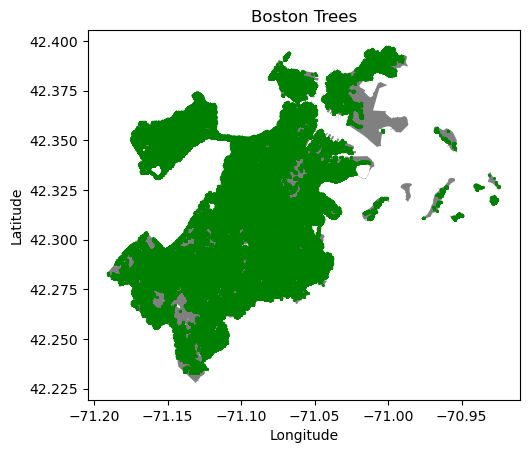

In [16]:
'''
Alex Kramer
DS 5110
Homework 1
Problem 3
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd

df_bos_map = gpd.read_file('City_of_Boston_Boundary.shp')
df_bos_map = df_bos_map.to_crs(epsg=4326)
ax = df_bos_map.plot(color='gray')

df = pd.read_csv('trees.csv')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.X, df.Y), crs="EPSG:4326")

gdf.head()

gdf.plot(ax=ax, legend=True,marker='*', color='green', markersize=2)

plt.xlabel('Longitude')
plt.ylabel("Latitude")
plt.title('Boston Trees')


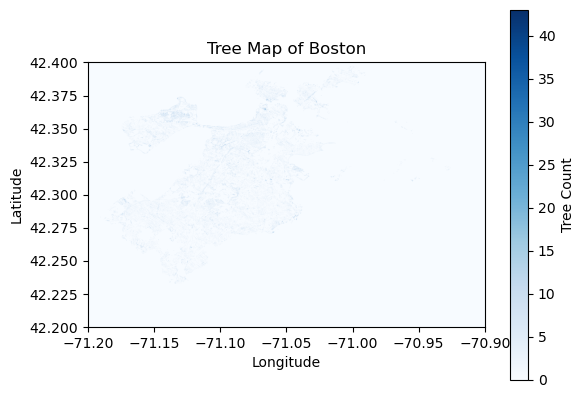

In [18]:
## Another way of doing it

# latitude range
min_lat = 42.200
max_lat = 42.400

# longitutde range
min_long = -71.20
max_long = -70.90

# array dimensions
rows = 1000
cols = 1000

# calculate cell size / increments for latitude & longitutde
lat_step = (max_lat - min_lat) / rows
long_step = (max_long - min_long) / cols


array = np.zeros((rows, cols))
trees = pd.read_csv('trees.csv') # read csv into a pandas table

# iterate through the table rows and assign =+1 to the cells in the array
for index, row in trees.iterrows(): # method generates an iterator object of the DataFrame, -> from Web3
                                    # allowing us to iterate each row in the DataFrame.
    # assign lat and long to the X & Y columns 
    lat = row['Y'] 
    long = row['X']

    # find index (index for the correct bucket) for the lat & long
    lat_index = int((lat - min_lat) / lat_step)
    long_index = int((long - min_long) / long_step)

    # +1 to the cell containing the tree
    array[lat_index, long_index] += 1

# plot the array 
plt.imshow(array, cmap='Blues', origin='lower', extent=[min_long, max_long, min_lat, max_lat])
plt.colorbar(label='Tree Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Tree Map of Boston')
plt.show()
